# Exploratory data Analysis

In [1]:
import pandas as pd

In [5]:
dados = pd.read_csv('dados/tips.csv')
dados.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [24]:
traducao = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [25]:
gorjetas = dados.rename(columns = traducao)

In [26]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [17]:
gorjetas.sobremesa.value_counts()

No     151
Yes     93
Name: sobremesa, dtype: int64

In [80]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}
gorjetas.sobremesa.replace(sim_nao, inplace = True)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,domingo,Jantar,2,0.06
1,10.34,1.66,Não,domingo,Jantar,3,0.16
2,21.01,3.50,Não,domingo,Jantar,3,0.17
3,23.68,3.31,Não,domingo,Jantar,2,0.14
4,24.59,3.61,Não,domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


In [22]:
gorjetas.sobremesa.value_counts(normalize = True)

Não    0.618852
Sim    0.381148
Name: sobremesa, dtype: float64

In [28]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [31]:
dias = {'Sun' : 'domingo',
        'Sat' : 'Sábado',
        'Thur' : 'Quinta',
        'Fri' : 'Sexta'
}
gorjetas.dia_da_semana.replace(dias, inplace = True)

In [34]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [36]:
hora ={
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}
gorjetas.hora_do_dia.replace(hora, inplace =True)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,domingo,Jantar,2
1,10.34,1.66,No,domingo,Jantar,3
2,21.01,3.50,No,domingo,Jantar,3
3,23.68,3.31,No,domingo,Jantar,2
4,24.59,3.61,No,domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sábado,Jantar,3
240,27.18,2.00,Yes,Sábado,Jantar,2
241,22.67,2.00,Yes,Sábado,Jantar,2
242,17.82,1.75,No,Sábado,Jantar,2


In [37]:
import seaborn as sns

In [38]:
sns.__version__

'0.11.0'

# Análise 1: Valor da conta e gorjeta

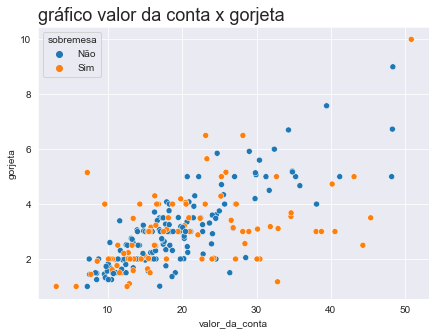

In [81]:
sns.set_style('darkgrid')
ax = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, hue = 'sobremesa')
ax.set_title('gráfico valor da conta x gorjeta', loc = 'left', fontsize = 18);
ax.figure.set_size_inches(7,5)

Visualmente olhando o gráfico parace que quanto maior o valor da conta, também é maior o valor da gorjeta!


In [55]:
print(f'a nossa base de dados contém: {gorjetas.shape[0]} \n')
print(f'e ela apresenta um total de registros nulos igual a {gorjetas.isna().sum().sum()}')

a nossa base de dados contém: 244 

e ela apresenta um total de registros nulos igual a 0


In [59]:
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


### Criando o atributo porcentagem, que será a divisão da gorjeta dada referente ao valor da conta

In [60]:
gorjetas['porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [67]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [68]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,domingo,Jantar,2,0.06
1,10.34,1.66,No,domingo,Jantar,3,0.16
2,21.01,3.50,No,domingo,Jantar,3,0.17
3,23.68,3.31,No,domingo,Jantar,2,0.14
4,24.59,3.61,No,domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sábado,Jantar,3,0.20
240,27.18,2.00,Yes,Sábado,Jantar,2,0.07
241,22.67,2.00,Yes,Sábado,Jantar,2,0.09
242,17.82,1.75,No,Sábado,Jantar,2,0.10


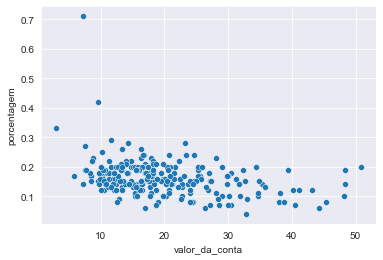

In [72]:
ax = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

visualmente o valor da conta não é proporcional ao valor da gorjeta

### utilizando outros metodos do seaborn como relplot

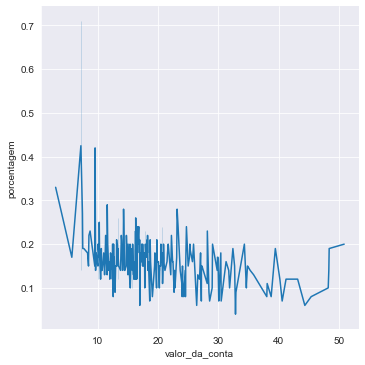

In [130]:
ax = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, kind = 'line')

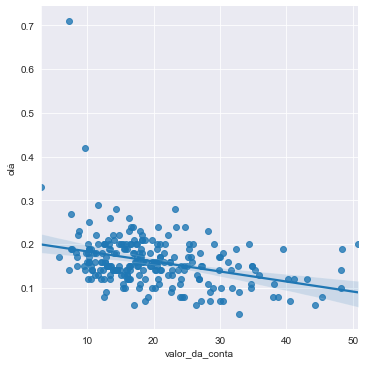

In [94]:
ax = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
ax.set_ylabels('olá')

In [102]:
grafico1 = ax.fig

In [103]:
grafico1.savefig('teste-salvando-gráfico.png')

In [105]:
ax.savefig('teste.png')

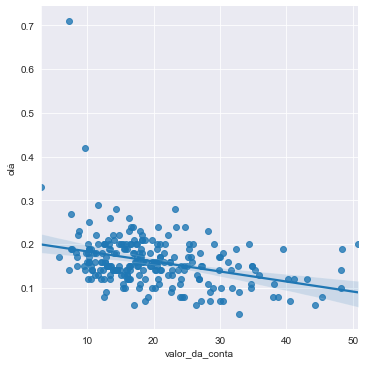

In [106]:
ax.fig

# Análise 2 - Sobremesa

In [121]:
selecao = (gorjetas.sobremesa == 'Sim') 
gorjetas[selecao].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [122]:
gorjetas[~selecao].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


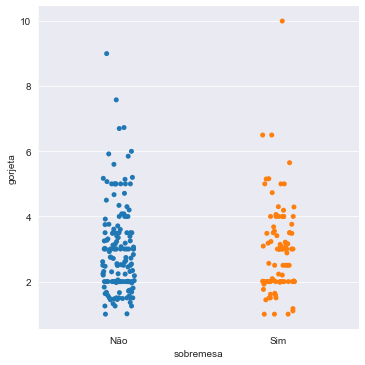

In [127]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

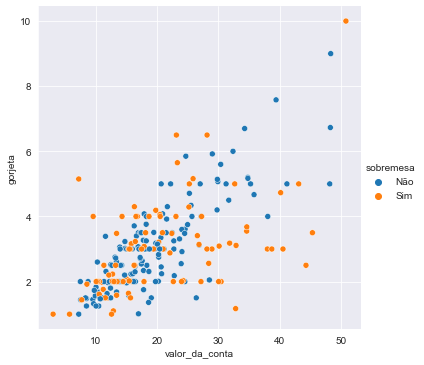

In [136]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, hue = 'sobremesa')

In [145]:
import matplotlib.pyplot as plt

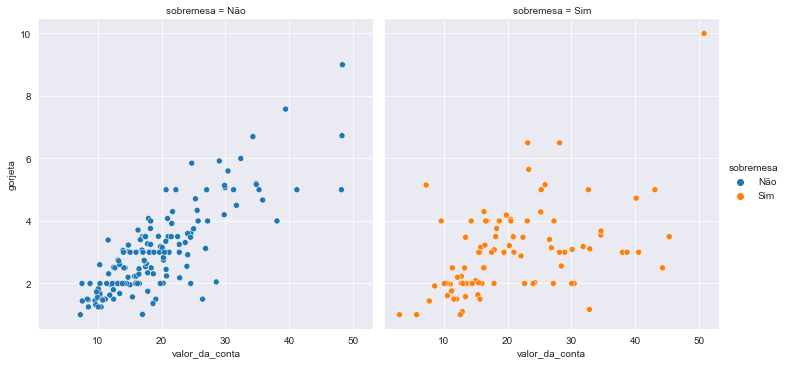

In [149]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, col = 'sobremesa', hue = 'sobremesa')

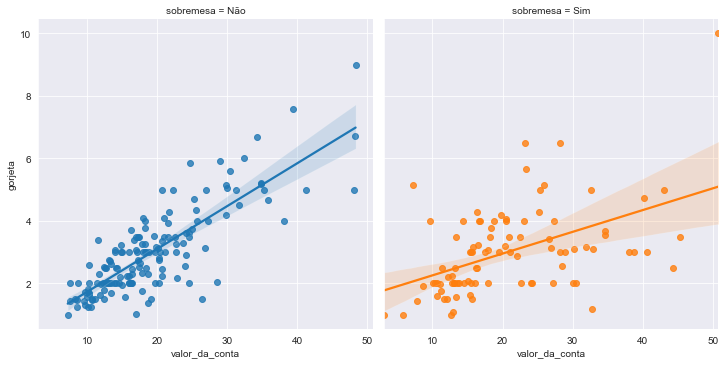

In [150]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, col = 'sobremesa', hue = 'sobremesa')

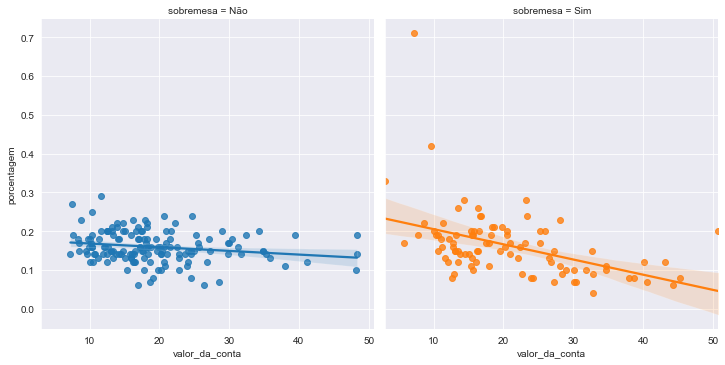

In [151]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, col = 'sobremesa', hue = 'sobremesa')

visualmente existe uma diferença no valor da gorjeta dos que pediram sobremesa e dos que não pediram

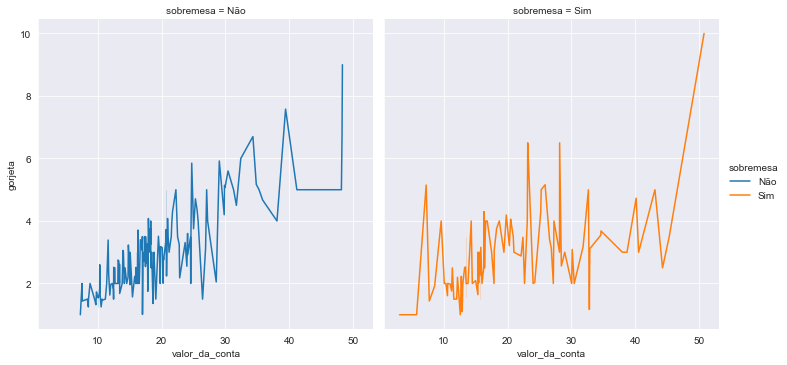

In [153]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, col = 'sobremesa', hue = 'sobremesa', kind = 'line')

## Teste de hipótese (gorjeta x sobremesa)

### H <sup>null</sup> -> **a distribuição da gorjeta é a mesma nos dois cenários da sobremesa**
### H <sup>alt</sup> -> **a distribuição da gorjeta não é a mesma nos dois cenários da sobremesa**

In [154]:
from scipy.stats import ranksums

In [155]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [156]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

olhando para o nosso p-valor vemos que nosso hipótese alternativa não tem relevância na nossa população pois o p=valor deu acima de 0.05

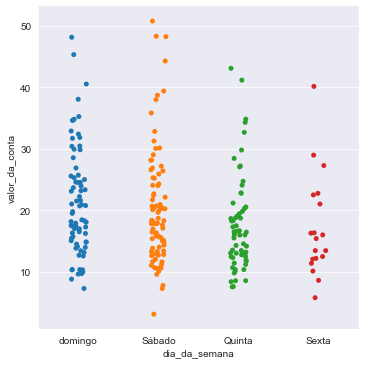

In [158]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

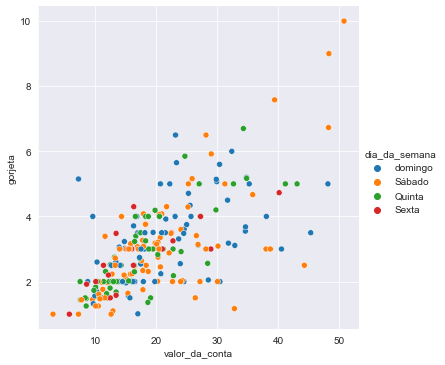

In [159]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, hue = 'dia_da_semana')

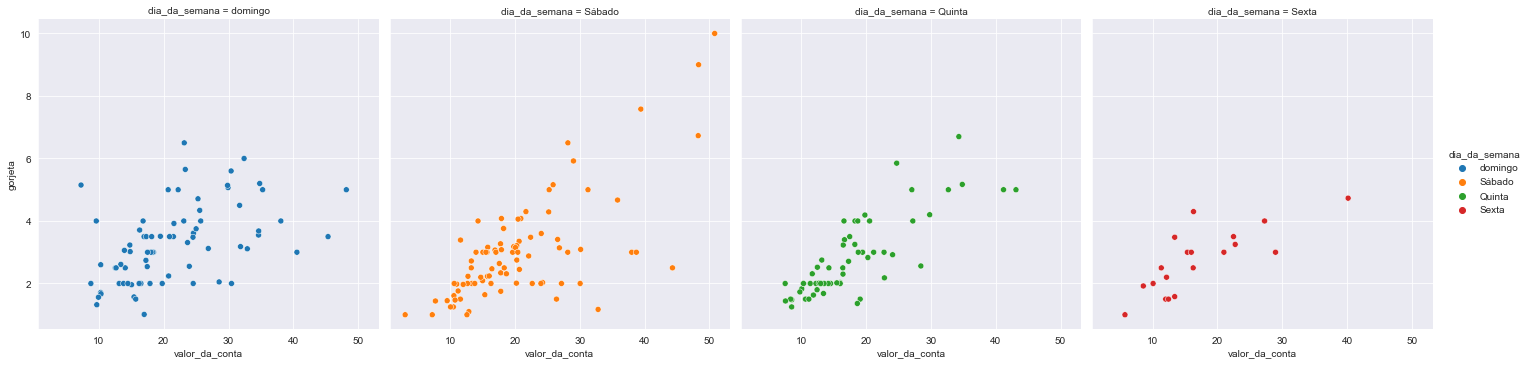

In [160]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana')

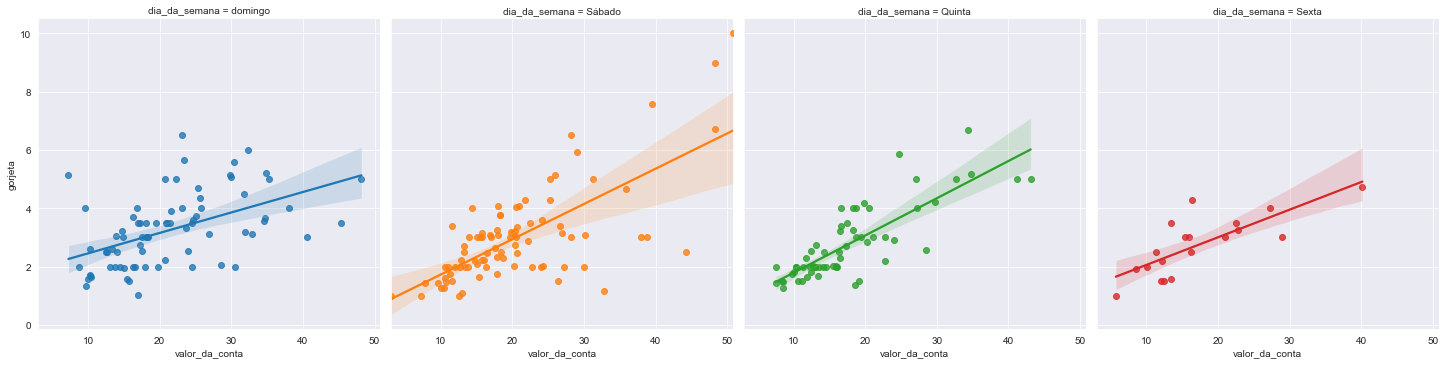

In [161]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana')

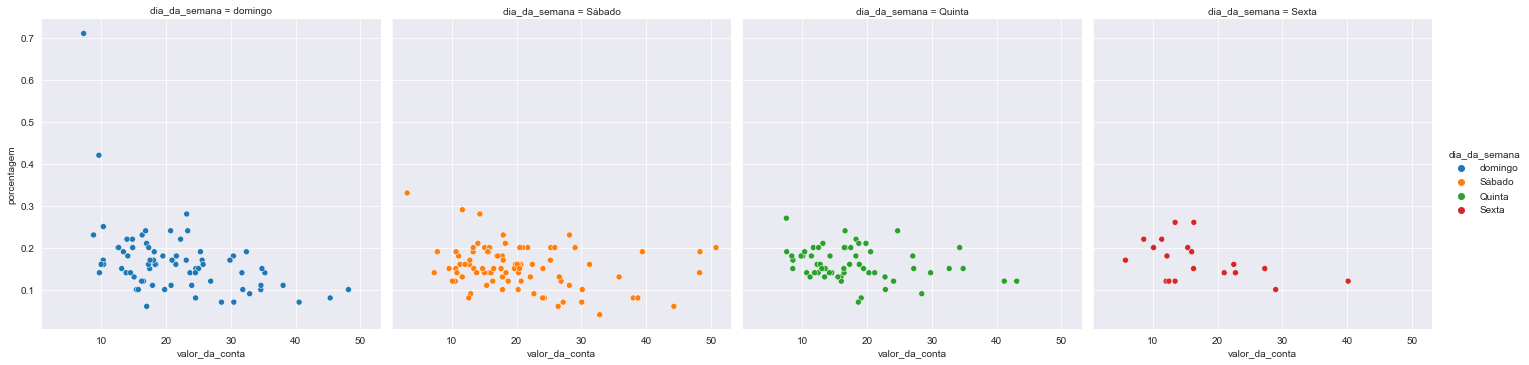

In [162]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana')

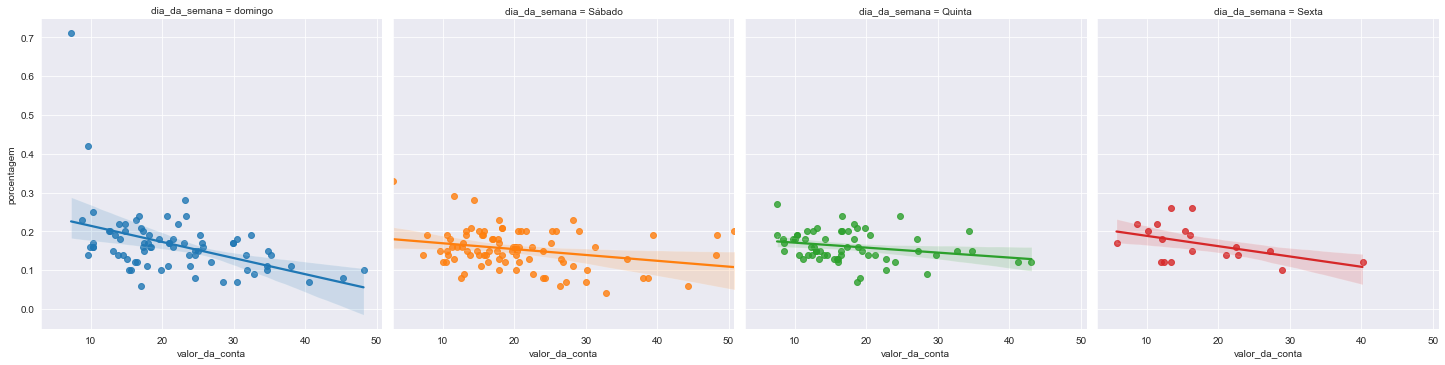

In [163]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, hue = 'dia_da_semana', col = 'dia_da_semana')

# Análise descritiva dos dados

**Média das gorjetas e média por dia das gorjetas**

In [168]:
round(gorjetas.gorjeta.mean(), 2)

3.0

In [171]:
gorjetas.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678
domingo,21.410000,3.255132,2.842105,0.166974


In [172]:
print('Frequência dos dias da semana no conjunto de dados')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias da semana no conjunto de dados


Sábado     87
domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese

#### H null - > a distribuição do valor da conta é igual no sábado e no domingo
#### H alt - > a distribuição do valor da conta é não igual no sábado e no domingo

In [179]:
valor_da_conta_domingo = gorjetas.query("dia_da_semana == 'domingo'").valor_da_conta

In [180]:
valor_da_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [181]:
ranksums(valor_da_conta_domingo, valor_da_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

# Análise 4 - hora da refeição

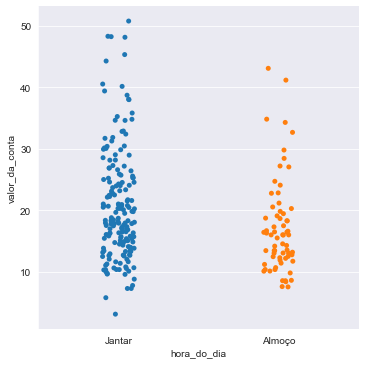

In [183]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

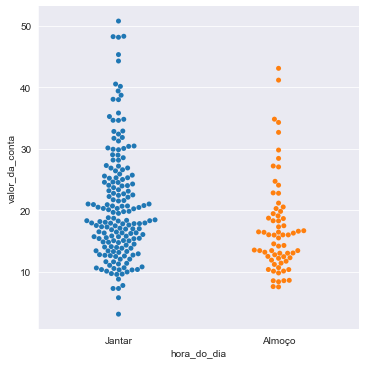

In [189]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, kind = 'swarm')

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

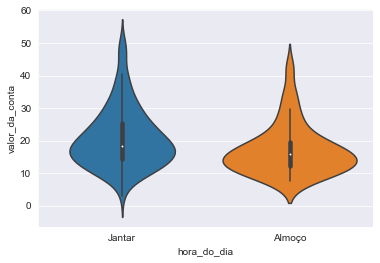

In [190]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

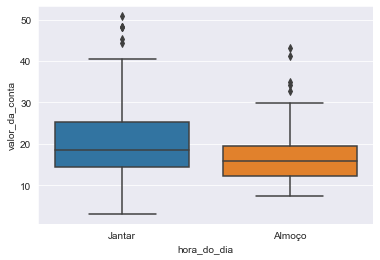

In [191]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

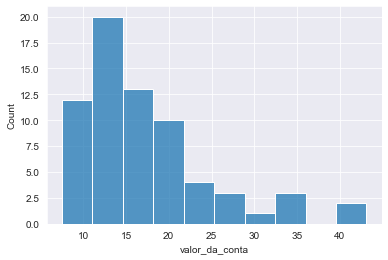

In [199]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.histplot(almoco)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

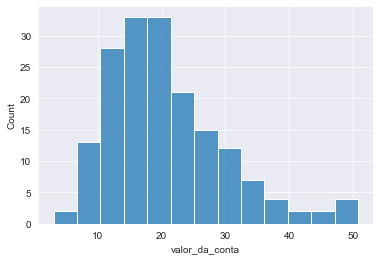

In [200]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
sns.histplot(jantar)